In [1]:
import pandas as pd

In [34]:
data = pd.read_excel('append1.xlsx')

In [35]:
data.describe()

,rating
count,11772.000000
mean,3.473242
std,1.523039
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [36]:
data.count()

web_pid      11772
title        11771
text         11758
rating       11772
text.1       11772
sentiment    11772
dtype: int64

In [37]:
data.head()

,web_pid,title,text,rating,text.1,sentiment
0,B0725RDJCQ,Five Stars,"Very good quality and ordered L, it fits as ex...",5,"Five StarsVery good quality and ordered L, it ...",Positive
1,B0725RDJCQ,The quality of fabrics is not good. According ...,The quality of fabrics is not good . According...,3,The quality of fabrics is not good. According ...,Neutral
2,B0725RDJCQ,Very good,I ordered this from paytm .good quality produc...,4,Very goodI ordered this from paytm .good quali...,Positive
3,B0725RDJCQ,Bad quality,Product looks same as in the image but its not...,2,Bad qualityProduct looks same as in the image ...,Negative
4,B071H63TH5,Very bad print and 3rd clasd,Print very bad,1,Very bad print and 3rd clasdPrint very bad,Negative


In [38]:
data = data.drop('title',axis=1)

In [39]:
data = data.drop('text',axis=1)

In [40]:
data.columns = ['web_pid','rating','text','sentiment']

In [41]:
data

,web_pid,rating,text,sentiment
0,B0725RDJCQ,5,"Five StarsVery good quality and ordered L, it ...",Positive
1,B0725RDJCQ,3,The quality of fabrics is not good. According ...,Neutral
2,B0725RDJCQ,4,Very goodI ordered this from paytm .good quali...,Positive
3,B0725RDJCQ,2,Bad qualityProduct looks same as in the image ...,Negative
4,B071H63TH5,1,Very bad print and 3rd clasdPrint very bad,Negative
5,B071H63TH5,1,poorpoor product,Negative
6,B071H63TH5,1,One StarPoor quality fabric and very poor print,Negative
7,B01LXSRQH2,5,very goodI am satisfied,Positive
8,B01LXSRQH2,4,Four StarsMaterial and fitting is good,Positive
9,B01LXSRQH2,5,Five Starsperfect,Positive


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
(len(data)-data.count())/len(data)

web_pid      0.0
rating       0.0
text         0.0
sentiment    0.0
dtype: float64

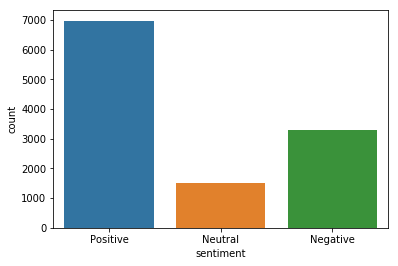

In [71]:
sns.countplot(x='sentiment',data=data)
plt.show()


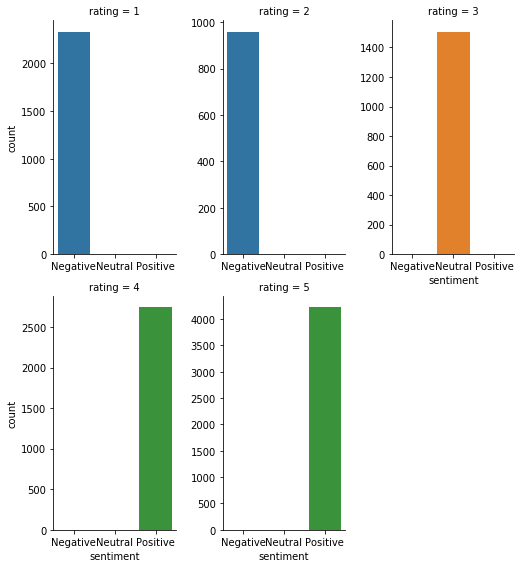

In [75]:
sns.factorplot(x = 'sentiment',data=data,order=['Negative','Neutral','Positive'],
               kind = 'count',col_wrap=3,col='rating',size=4,aspect=0.6,sharex=False,sharey=False)
plt.show()

In [76]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
#remove words which are starts with @ symbols
data['text'] = data['text'].map(lambda x:re.sub('@\w*','',str(x)))
#remove link starts with https
data['text'] = data['text'].map(lambda x:re.sub('http.*','',str(x)))
#removing data and time (numeric values)
data['text'] = data['text'].map(lambda x:re.sub('[0-9]','',str(x)))
#removing special characters
data['text'] = data['text'].map(lambda x:re.sub('[#|*|$|:|\\|&]','',str(x)))

In [78]:
data.head()

,web_pid,rating,text,sentiment
0,B0725RDJCQ,5,"Five StarsVery good quality and ordered L, it ...",Positive
1,B0725RDJCQ,3,The quality of fabrics is not good. According ...,Neutral
2,B0725RDJCQ,4,Very goodI ordered this from paytm .good quali...,Positive
3,B0725RDJCQ,2,Bad qualityProduct looks same as in the image ...,Negative
4,B071H63TH5,1,Very bad print and rd clasdPrint very bad,Negative


In [79]:
import numpy as np
data.text.fillna('ok')
col_mask=data.isnull().any(axis=0) 

In [80]:
col_mask

web_pid      False
rating       False
text         False
sentiment    False
dtype: bool

In [81]:
#preparing train data
#removing stopwords and tokenizing it.
stop=stopwords.words('english')
text=[]
none=data['text'].map(lambda x:text.append(' '.join
       ([word for word in str(x).strip().split() if not word in set(stop)])))
tfid=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)
x_features=tfid.fit_transform(text).toarray()

In [82]:
np.isfinite(x_features.all())


True

In [43]:
#preparing target variable
y=data['sentiment']
y=pd.DataFrame(y,columns=['sentiment'])
y = y['sentiment'].map({'Neutral':1,'Negative':2,'Positive':0})

In [85]:
np.isfinite(y.all())
np.argwhere(np.isnan(x_features))

array([], shape=(0, 2), dtype=int64)

In [42]:
#training with Logistic Regression
from sklearn.linear_model import LogisticRegression as lg
from sklearn.model_selection import cross_val_score

In [110]:
clf=lg()
acc=cross_val_score(estimator=clf,X=x_features,y=y,cv=5)
acc

array([0.89940577, 0.90615711, 0.90658174, 0.89502762, 0.89927752])

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_features,y, test_size=0.2,random_state=2)
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
clf.predict(X_test)

array([0, 0, 0, ..., 2, 0, 2], dtype=int64)

In [117]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [95]:
#lets dig deeper and apply Deep learning for better accuracy
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import regularizers
from keras.layers import Dropout

Using TensorFlow backend.


In [96]:
# Transforming our target vatiable
from sklearn.preprocessing import OneHotEncoder

In [101]:
y

0        0
1        1
2        0
3        2
4        2
5        2
6        2
7        0
8        0
9        0
10       2
11       2
12       1
13       2
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       2
25       0
26       0
27       0
28       2
29       1
        ..
11742    0
11743    0
11744    0
11745    0
11746    0
11747    0
11748    0
11749    2
11750    2
11751    2
11752    0
11753    0
11754    2
11755    2
11756    0
11757    2
11758    2
11759    0
11760    2
11761    0
11762    0
11763    0
11764    0
11765    2
11766    0
11767    0
11768    0
11769    0
11770    0
11771    2
Name: sentiment, Length: 11772, dtype: int64

In [103]:
onehotencoder=OneHotEncoder()
target=y.values
target=target.reshape(-1,1)
target=onehotencoder.fit_transform(target).toarray()

In [104]:
target=pd.DataFrame(data=target,columns=['positive','neutral','negative'])
target.head()

,positive,neutral,negative
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [107]:
nn=Sequential()
#adding layers to ANN
nn.add(Dense(units=5012,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001),input_dim=10186))
nn#adding two more hidden layer to ANN
nn.add(Dense(units=5012,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
nn.add(Dropout(0.5))
nn.add(Dense(units=5012,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
nn.add(Dropout(0.5))
#adding output layer
nn.add(Dense(units=3,activation="softmax",kernel_initializer="uniform"))
#compiling ANN
nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fitting ANN
nn.fit(x_features,target,batch_size=32,epochs=4)


Epoch 1/8
11772/11772 [==============================] - 951s 81ms/step - loss: 6.0244 - acc: 0.8607
Epoch 2/8
11772/11772 [==============================] - 941s 80ms/step - loss: 0.6167 - acc: 0.9122
Epoch 3/8
11772/11772 [==============================] - 953s 81ms/step - loss: 0.5493 - acc: 0.9242
Epoch 4/8
11772/11772 [==============================] - 946s 80ms/step - loss: 0.4963 - acc: 0.9326
Epoch 5/8
11772/11772 [==============================] - 935s 79ms/step - loss: 0.4451 - acc: 0.9455
Epoch 6/8
11772/11772 [==============================] - 940s 80ms/step - loss: 0.4154 - acc: 0.9524
Epoch 7/8
11772/11772 [==============================] - 933s 79ms/step - loss: 0.3894 - acc: 0.9571
Epoch 8/8
11772/11772 [==============================] - 954s 81ms/step - loss: 0.3697 - acc: 0.9619
